In [7]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import pickle
from sklearn.metrics import classification_report

In [2]:
# Importing the test dataset

file =open("test_data/test.pickle",'rb')
x_test = pickle.load(file)
y_test = pickle.load(file)

In [3]:
# load model

file = open("Model_pickle/Model.pickle",'rb')
classifier = pickle.load(file)

In [4]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)

In [5]:
# Making the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 4 18]]


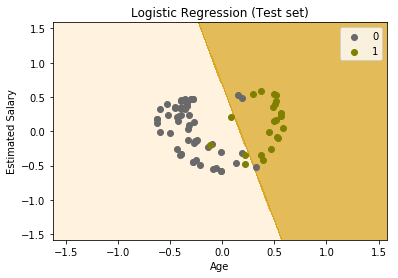

In [8]:
# Visualising the Test set results

X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('papayawhip', 'goldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('dimgrey', 'olive'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [9]:
# Visualising the classification report

print("\n",classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          0       0.93      0.95      0.94        58
          1       0.86      0.82      0.84        22

avg / total       0.91      0.91      0.91        80

